# 第2章 感知机
感知机模型实际是最简单的模型之一，台大林轩田老师发布的《机器学习基石》教程中，称之为“知错能改验算法”，就是发现错误进行纠正，具体这个算法的过程如下。
## 2.1感知机模型
>定义: 输入空间到输出空间的函数为$f(x) = sign(w\cdot x + b)$  
其中
$$ sign(x)=\left\{
\begin{array}{rcl}
+1,     &      & {x \geq 0}\\
-1,     &      & {x < 0}
\end{array} \right. $$
目的: 学习一组$w$和$b$来定义一个超平面$f(x)$对数据进行线性分割.
另外, 真实类别标签$y$的取值范围集合是$\{ +1,-1\}$

In [1]:
#定义sign函数
def sign(x):
    if x>= 0:
        return 1
    if x<0:
        return -1

## 2.2学习策略
既然上面$sign\left( x\right)$已经定义好了，那么接下来要做的就是求解$w$和$b$了
>先定义**损失函数**,并用它来量化模型好不好，由于损失函数是说明一个模型“出现问题”的指标，所以我们需要最小化之.
这里以距离作为损失函数的考量指标,首先，定义输入空间任一点$(x_0,y_0)$到分类超平面的距离为
$$ distance = \frac{1}{\left\|w\right\|} \left|w\cdot x_0+b \ \right|$$
对于真实数据集样本$(x_i,y_i)$,根据2.1中的式子，若分类正确,$w\cdot x_i + b \geq 0$时$y_i \geq 0$,若是分错的,$w\cdot x_i + b \geq 0$时$y_i < 0$，
则对于被误分类的数据$(x_i,y_i)$,会得到如下不等式关系  
$$-y_i(w\cdot x_i +b)>0$$
且误分类点到超平面的距离为
$$distance = -\frac{1}{\left\|w\right\|}y_i(w\cdot x_i +b)$$  
若定义所有被误分类的点的集合为$M$,则所有被误分类的点到超平面的总距离为
$$ALL\_distance = -\frac{1}{\left\|w\right\|}\sum_{x_i\in M} y_i(w\cdot x_i +b)$$  
此时,我们不关心$\frac{1}{\left\|w\right\|}$,定义损失函数为$$L(w,b) = -\sum_{x_i \in M}y_i(w\cdot x_i +b)$$  
(注:$L$是个非负函数,可以进行即最小值的求解，且最理想的状态是使$L=0$)

## 2.3设置最优化函数
>当前,为了得到最终的$f(x)$,这里需要最小化式子$L(w,b) = -\sum_{x_i \in M}y_i(w\cdot x_i +b)$来求得$w$和$b$,所以有目标
$$\underset{w,b}{\min} L(w,b) = -\sum_{x_i \in M}\ y_i(w\cdot x_i +b)$$
由于真实环境中，数据往往是高维度的数据，单纯的使用高数中学习的求导等于0的方法在这里已经很不好用了。而求解高维数据的极值问题，专业的描述方法称之为“凸优化”问题，即对凸函数求解极值的过程。为了最小化上式,这里使用SGD(随机梯度下降算法来求解),详见2.3.1

### 2.3.1随机梯度下降(stochastic gradient descent,SGD)
>这里对SGD方法进行讲解:  
首先,要求解的问题空间可以理解为求解$\underset{w,b}{\min} L(w,b) = -\sum_{x_i \in M}\ y_i(w\cdot x_i +b)$,在三维空间中,可以想象成求解盆地的那个时候的值.SGD的"下降"思路是一次随机选择一个误分类点来指导损失函数使其梯度下降（往盆地的方向走），直到下降到不能再低的时候停止。  
假设误分类点的集合$M$固定,则$L(w,b)$的梯度为
$$\nabla_w L(w,b)= -\sum_{x_i \in M}y_i x_i$$
$$\nabla_b L(w,b)= -\sum_{x_i \in M}y_i$$
随机选取一个误分类点$(x_i,y_i)$,对$w$和$b$进行更新:
$$w \leftarrow w + \eta y_i x_i$$
$$b \leftarrow b + \eta y_i$$
其中,$\eta$是学习率,学习率应该在(0,1]之间，学习率就相当于下台阶一样，你步子跨得大了，一次下两个台阶，下降得快，步子小了，一次跨一个，下降的就慢。

### 2.3.2感知机学习算法的原始形式
>输入:  $T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$ ,学习率$\eta(0 < \eta \leq 1)$  
输出: $w$和$b$,感知机模型$f(x) = sign(w\cdot x + b)$  
* (1)选取$w$,$b$(可以随机选取)
* (2)在训练集合中选择数据$(x_i,y_i)$
* (3)如果$y_i(w\cdot x_i +b)\leq 0$
$$w \leftarrow w + \eta y_i x_i$$
$$b \leftarrow b + \eta y_i$$
* (4)跳至(2),直至训练集中没有误分类点或者损失函数降低到给定阈值的范围之内

In [2]:
# 这里定义算法的测试样本
import numpy as np
x = np.array([[3,4],[1,1],[4,3],[1,0],[3,1],[4,2],[2,2],[4,0]]) # 定义三个数据向量(8行_2列,数组)
y = np.array([1,-1,1,-1,-1,1,-1,1]).T # 定义类别标签(8行_1列,向量)
w0 = np.array([0.5,0.5]) # 定义并初始化参数向量(1行2列,向量)
b0 = 0.0 # 偏置项
eta = 0.02 # 学习率
posindex = x[y[:] == 1] # 绘图用，标记正样本id
negindex = x[y[:] == -1] # 绘图用，标记负样本id

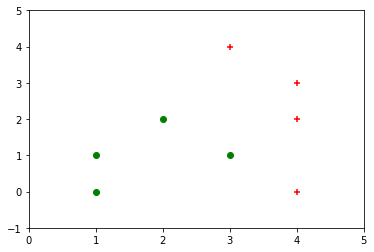

In [3]:
# 绘制散点图
import matplotlib.pyplot as plt
plt.figure(0)
# c='red'定义为红色，alpha是透明度，marker是画的样式
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
# c='red'定义为红色，alpha是透明度，marker是画的样式
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
plt.axis([0,5,-1,5])
plt.show()

In [4]:
# 定义损失函数,根据2.2-2.3的推导
def calLoss(x,y,w,b):
    """
    计算损失,包含4个参数,分别为:
    x: 数据
    y: 类别标签
    w: 参数向量
    b: 偏置项
    返回损失值
    """
    loss = 0
    for i in range(len(x)):
        if(y[i] * (np.dot(w,x[i].T) + b) < 0):
            loss = loss + (-y[i] * (np.dot(w,x[i].T) + b))
    return loss

========================iteration0========================
w = [ 0.48  0.48] , b = -0.02 	Loss = 5.5


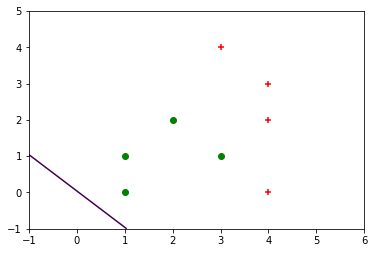

========================iteration1========================
w = [ 0.46  0.46] , b = -0.04 	Loss = 5.2


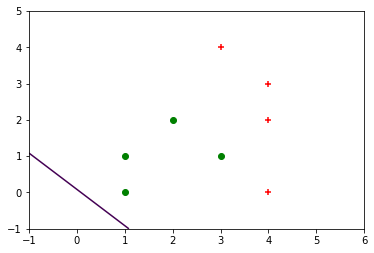

========================iteration2========================
w = [ 0.44  0.44] , b = -0.06 	Loss = 4.9


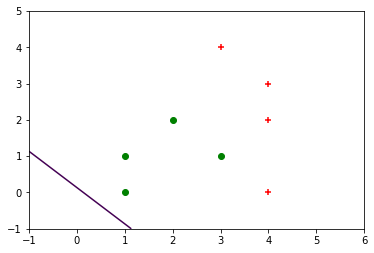

========================iteration3========================
w = [ 0.42  0.42] , b = -0.08 	Loss = 4.6


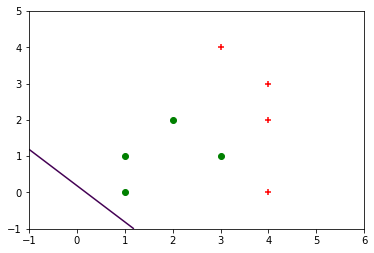

========================iteration4========================
w = [ 0.4  0.4] , b = -0.1 	Loss = 4.3


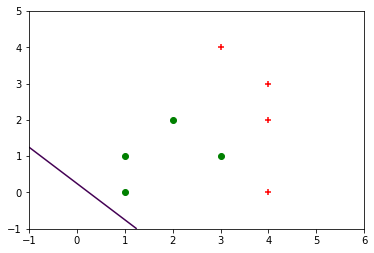

========================iteration5========================
w = [ 0.38  0.38] , b = -0.12 	Loss = 4.0


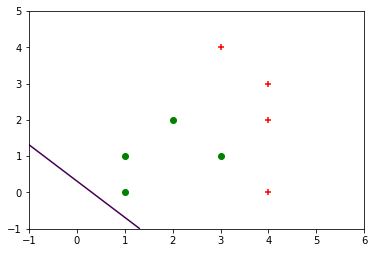

========================iteration6========================
w = [ 0.36  0.36] , b = -0.14 	Loss = 3.7


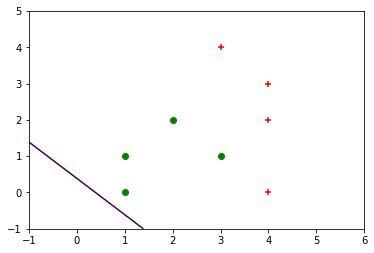

========================iteration7========================
w = [ 0.34  0.34] , b = -0.16 	Loss = 3.4


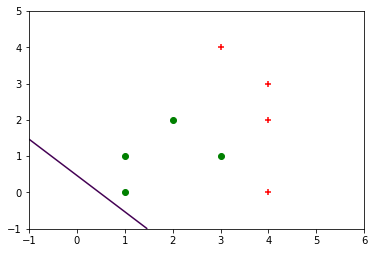

========================iteration8========================
w = [ 0.32  0.32] , b = -0.18 	Loss = 3.1


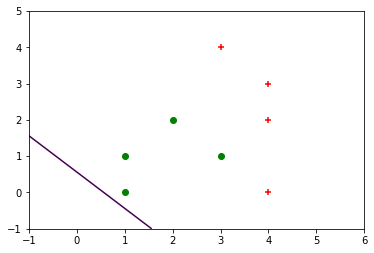

========================iteration9========================
w = [ 0.3  0.3] , b = -0.2 	Loss = 2.8


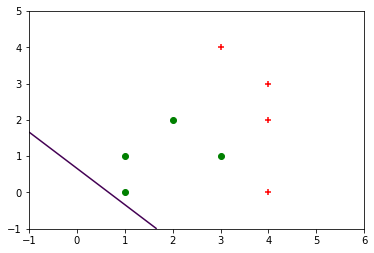

========================iteration10========================
w = [ 0.28  0.28] , b = -0.22 	Loss = 2.5


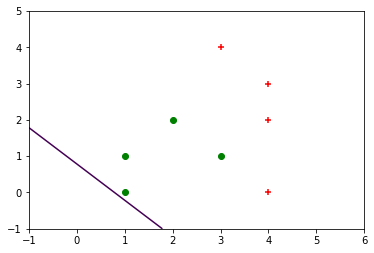

========================iteration11========================
w = [ 0.26  0.26] , b = -0.24 	Loss = 2.2


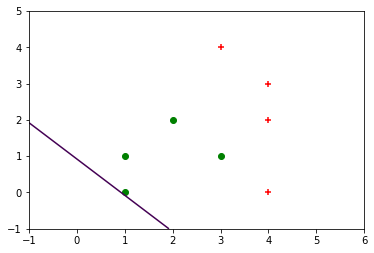

========================iteration12========================
w = [ 0.24  0.24] , b = -0.26 	Loss = 1.9


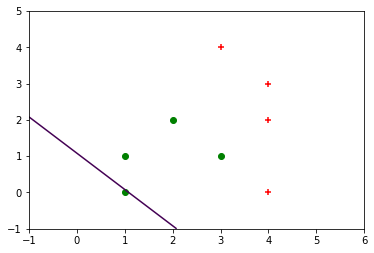

========================iteration13========================
w = [ 0.22  0.22] , b = -0.28 	Loss = 1.62


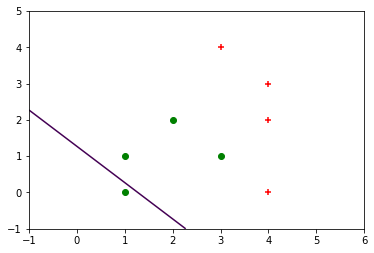

========================iteration14========================
w = [ 0.2  0.2] , b = -0.3 	Loss = 1.36


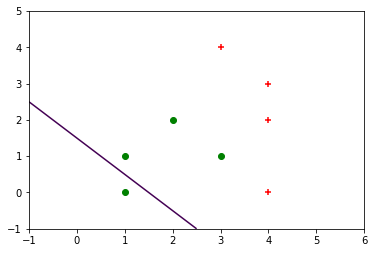

========================iteration15========================
w = [ 0.18  0.18] , b = -0.32 	Loss = 1.1


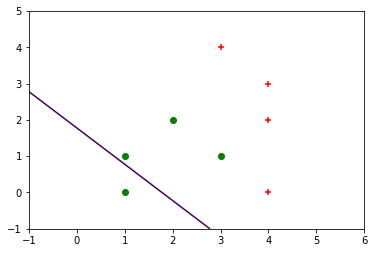

========================iteration16========================
w = [ 0.16  0.16] , b = -0.34 	Loss = 0.84


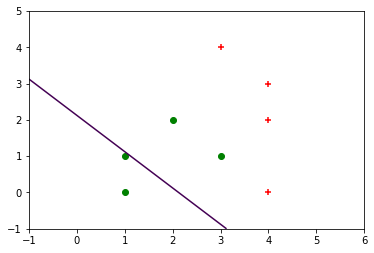

========================iteration17========================
w = [ 0.1   0.14] , b = -0.36 	Loss = 0.6


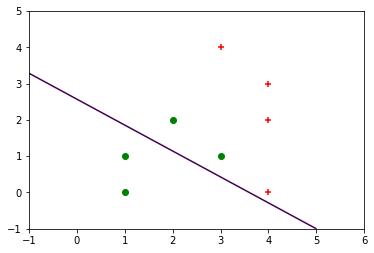

========================iteration18========================
w = [ 0.04  0.12] , b = -0.38 	Loss = 0.2


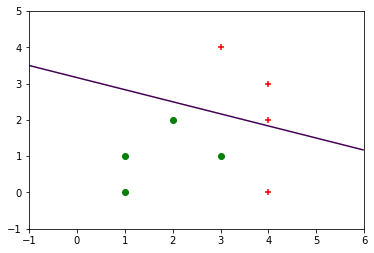

========================iteration19========================
w = [ 0.12  0.12] , b = -0.36 	Loss = 0.22


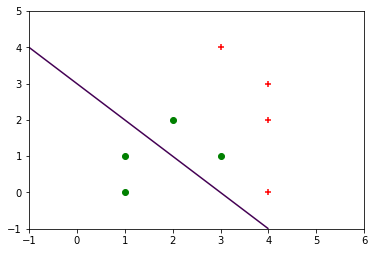

========================iteration20========================
w = [ 0.06  0.1 ] , b = -0.38 	Loss = 0.24


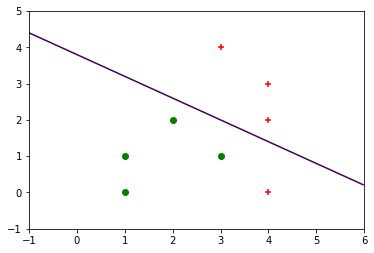

========================iteration21========================
w = [ 0.14  0.1 ] , b = -0.36 	Loss = 0.14


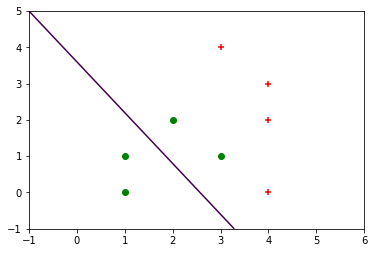

========================iteration22========================
w = [ 0.08  0.08] , b = -0.38 	Loss = 0.28


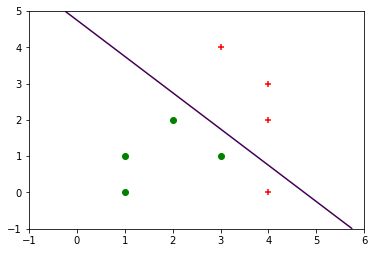

========================iteration23========================
w = [ 0.16  0.08] , b = -0.36 	Loss = 0.06


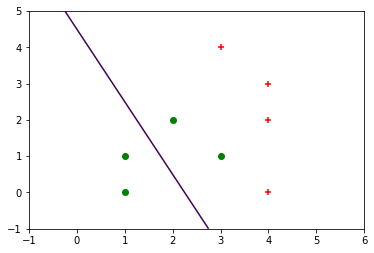

========================iteration24========================
w = [ 0.1   0.06] , b = -0.38 	Loss = 0.32


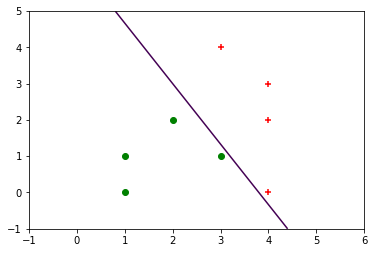

========================iteration25========================
w = [ 0.1   0.06] , b = -0.38 	Loss = 0


In [5]:
# 测试:
w = w0
b = b0
iterNum = 40
for iter in range(iterNum):
    print('========================iteration'+ str(iter)+'========================')
    for i in range(len(x)):
        if(y[i] * (np.dot(w,x[i].T) + b) < 0):# 如果wx+b小于0,则表示分错了,使用2.3.1中的SGD方法更新权值
            w = w + eta * y[i] * x[i]
            b = b + eta * y[i]
            break
        loss = calLoss(x,y,w,b)
    print('w =',w,', b =',b,'\tLoss = ' + str(loss))
    if loss == 0:
        break
    #以下部分是画图，可以动态展示学习过程中的每次迭代过程的模型变化，如果不想看，也可以注释掉，直接输出每次迭代的参数学习结果
    plt.figure(i)
    plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup')
    plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup')
    xrange = np.arange(-1, 6, .01)
    yrange = np.arange(-1, 5, .01)
    xrange, yrange = np.meshgrid(xrange, yrange)
    f = w[0]*xrange + w[1]*yrange + b
    plt.contour(xrange, yrange, f,0)
    plt.show()

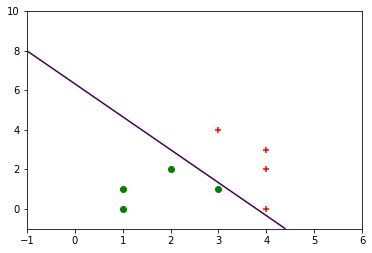

In [6]:
# 绘制最终的曲线
import matplotlib.pyplot as plt
plt.figure(i)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup')
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup')
xrange = np.arange(-1, 6, .01)
yrange = np.arange(-1, 10, .01)
xrange, yrange = np.meshgrid(xrange, yrange)
f = w[0]*xrange + w[1]*yrange + b
plt.contour(xrange, yrange, f,0)
plt.show()

这里我们重新定义一些散点，并试图编写自己的感知机算法来预测这些点的值

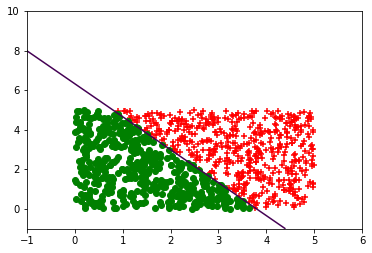

0.1 0.06 -0.38


In [7]:
# 重新构造一些数据
testx = 5*np.random.rand(1000,2)
Predicting_Lables = []
for i in range(len(testx)):
    Predicting_Lables.append(sign(np.dot(w,testx[i]) + b))
Predicting_Lables = np.array(Predicting_Lables)

plt.figure(0)
t_pos_index = testx[Predicting_Lables[:] == 1]
t_neg_index = testx[Predicting_Lables[:] == -1]
plt.scatter(t_pos_index[:,0], t_pos_index[:,1], c='red', alpha=1, marker='+') # c='red'定义为红色，alpha是透明度，marker是画的样式
plt.scatter(t_neg_index[:,0], t_neg_index[:,1], c='green', alpha=1, marker='o') # c='red'定义为红色，alpha是透明度，marker是画的样式

xrange = np.arange(-1, 6, .01)
yrange = np.arange(-1, 10, .01)
xrange, yrange = np.meshgrid(xrange, yrange)
f = w[0]*xrange + w[1]*yrange + b
plt.contour(xrange, yrange, f,0)
plt.show()
print(w[0],w[1],b)

# 2.4定义自己的感知机函数

In [8]:
import numpy as np
import matplotlib.pyplot as plt
class myPerceptron():
    def train(self,x,y,learningrate,iteration):
        """
        x: 数据本身
        y: 数据类别标签
        learningrate: 学习率
        iteration: 最大迭代次数
        返回训练好的w和b
        """
        self.x = x
        self.y = y
        self.iteration = iteration
        self.learningrate = learningrate
        x_dim = x.ndim
        w_0 = np.random.rand(1,x_dim)
        b_0 = 0
        w = w_0
        b = b_0
        model = []
        history = np.empty(iteration)
        for iter in range(self.iteration):
            for i in range(len(self.x)):
                if(self.y[i] * (np.dot(w,self.x[i].T) + b) < 0):# 如果满足小于0,则表示分错了
                    w = w + learningrate * self.y[i] * self.x[i]
                    b = b + learningrate * self.y[i]
                    iter_loss = calLoss(self.x,self.y,w,b)
                    if np.mod(iter,20) == 0:
                        print('=============================Iteration '+ str(iter)+'=============================')
                        print('w =',w,', b =',b,'\tLoss = ' + str(iter_loss))
                    history[iter] = iter_loss
                    break
            if(iter_loss == 0):
                break
        model.append(w)
        model.append(b)
        model.append(range(iter))
        model.append(history[:iter])
        return model
    
    def predict(self,x,model):
        """
        x 应该与train中的x具有相同的维度数
        y 为预测类别标签
        """
        self.x = x
        self.model = model
        y = []
        for i in range(len(x)):
            y.append(sign(np.dot(self.model[0],self.x[i]) + self.model[1]))
        return y
        
    def plotTrainingHistry(self,model):
        plt.figure(0)
        x_ = model[2]
        y_ = model[3]
        plt.plot(x_,y_)
        plt.show()
    
    def calLoss(self,x,y,w,b):
        """
        计算损失,包含4个参数,分别为:
        x: 数据
        y: 类别标签
        w: 参数向量
        b: 偏置项
        返回损失值
        """
        loss = 0
        self.x = x
        self.y = y
        self.w = w
        self.b = b
        for i in range(len(self.x)):
            if(self.y[i] * (np.dot(self.w,self.x[i].T) + self.b) < 0):
                loss = loss + (-self.y[i] * (np.dot(self.w,self.x[i].T) + self.b))
        return loss
    
    def accuracy(self,y,realy):
        self.y = y
        self.realy = realy
        return 1-sum(np.sign(np.abs(y-realy)))/len(y)

In [9]:
mp = myPerceptron()
model = mp.train(testx[:],Predicting_Lables,0.0008,1000)

=============================Iteration 0=============================
w = [[ 0.53790785  0.35961756]] , b = -0.0008 	Loss = [ 693.35508063]
=============================Iteration 20=============================
w = [[ 0.49847513  0.34268609]] , b = -0.0168 	Loss = [ 643.90187669]
=============================Iteration 40=============================
w = [[ 0.4590424   0.32575461]] , b = -0.0328 	Loss = [ 594.44867274]
=============================Iteration 60=============================
w = [[ 0.41960968  0.30882314]] , b = -0.0488 	Loss = [ 544.9954688]
=============================Iteration 80=============================
w = [[ 0.38017696  0.29189167]] , b = -0.0648 	Loss = [ 495.54226486]
=============================Iteration 100=============================
w = [[ 0.34074424  0.2749602 ]] , b = -0.0808 	Loss = [ 446.08906091]
=============================Iteration 120=============================
w = [[ 0.30131152  0.25802872]] , b = -0.0968 	Loss = [ 396.65143318]
=============

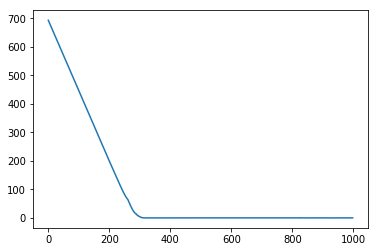

In [10]:
mp.plotTrainingHistry(model)

In [11]:
y = mp.predict(testx,model)
print('正确率：',mp.accuracy(y,Predicting_Lables))

正确率： 0.993
